# Hands State Classification

In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.decomposition import PCA
import pandas.util.testing as tm
import pickle

#### we have 3 kinds of hands states
##### lets plot the correlation between the features of each state to see the difference 

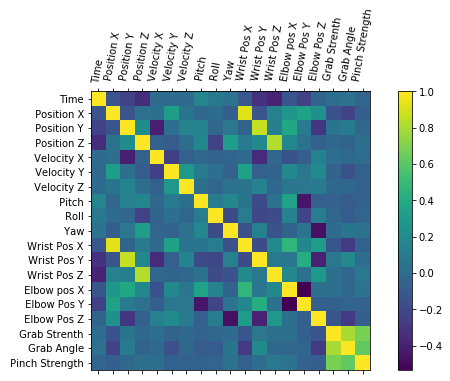

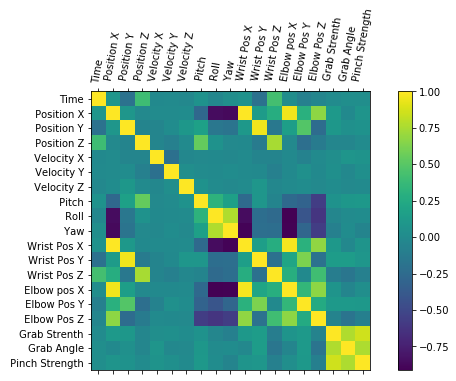

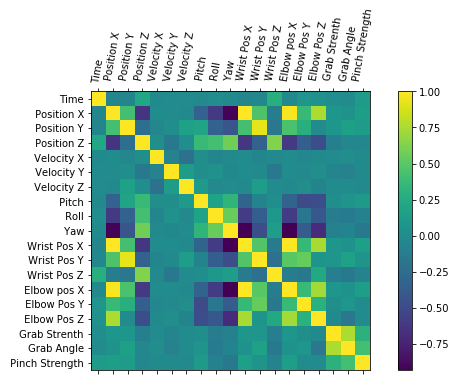

In [550]:
alone=pd.read_csv('Unity Data/Training/Evyatar Cohen/Evyatar636771054555711409Alone.csv')
sync=pd.read_csv('Unity Data/Training/Evyatar Cohen/Evyatar636771053639929594Sync.csv')
spontan=pd.read_csv('Unity Data/Training/Evyatar Cohen/Evyatar636771052727603804Spontan.csv')

numeric_df = alone.drop([" Frame ID"," Hand Type"," # hands"], axis=1) 
corr = numeric_df.corr()

f = plt.figure(figsize=(10, 5))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10, rotation=80)
plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show()

numeric_df = sync.drop([" Frame ID"," Hand Type"," # hands"], axis=1) 
corr = numeric_df.corr()

f = plt.figure(figsize=(10, 5))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10, rotation=80)
plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show()

numeric_df = spontan.drop([" Frame ID"," Hand Type"," # hands"], axis=1) 
corr = numeric_df.corr()

f = plt.figure(figsize=(10, 5))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10, rotation=80)
plt.yticks(range(numeric_df.shape[1]), numeric_df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show()

## construction of the data

In [565]:
def new_cols(l,i):
    new_cols = ["index"]
    for col in l:
            new_cols.append(col+str(i))
    return new_cols

In [566]:
def compress_data(df):
    li=[df0,df1,df2,df3,df4]
    for i in range(0,5):
        li[i]=df[df.index%5==i].reset_index()
        if (i != 0):
            new_col=new_cols(list(df.columns),i)
            li[i].columns=new_col
            li[i]=li[i].drop(['Time'+str(i),' Frame ID'+str(i),' Hand Type'+str(i),' # hands'+str(i),'index'],axis=1)
    return pd.concat(li, axis=1).drop(['index'],axis=1)

In [567]:
def make_class(file):
    if 'Spontan' in file:
        state_type = 1
    if 'Sync' in file:
        state_type = 2
    if 'Alone'in file:
        state_type = 3
    return state_type

In [568]:
def construct_datasets(adress):
    files = glob.glob(adress)
    l= []

    for file in files:
        df = pd.read_csv(file, index_col=None, header=0)
        
        #ignor the first 7 seconds
        start_time = df["Time"].min()
        df = df[df["Time"]>start_time+7]
        
        #combine the rows 
        df = compress_data(df)
        #insert class label
        df['state'] = make_class(file)
        df['name'] = file.split("\\")[1]
        
        df["Time"] = df["Time"].astype("float")
        df["state"] = df["state"].astype("int")
        l.append(df)
        
    df = pd.concat(l, axis=0, ignore_index=True)
    
    return df
trainning = construct_datasets("Unity Data/Training/*/*.csv")
trainning

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos Y4,Wrist Pos Z4,Elbow pos X4,Elbow Pos Y4,Elbow Pos Z4,Grab Strenth4,Grab Angle4,Pinch Strength4,state,name
0,71.44753,98076.0,left,2.0,-110.42230,231.4766,85.786140,0.774960,77.71951,-72.85492,...,167.4718,16.26752,312.2578,1.103906,142.78720,0.0,0.233833,0.0,1,Evyatar Cohen
1,71.48033,98080.0,right,2.0,139.30040,214.3510,-22.173040,16.260040,217.15190,272.25280,...,192.3551,51.94658,-346.5293,30.469920,24.87281,0.0,0.000000,0.0,1,Evyatar Cohen
2,71.53003,98086.0,left,2.0,-113.91830,249.2464,79.042270,-65.101010,277.79990,-91.00920,...,176.4954,24.22665,337.1487,-0.519946,106.73040,0.0,0.114437,0.0,1,Evyatar Cohen
3,71.56316,98090.0,right,2.0,144.09590,239.4014,5.308109,127.349900,352.48910,385.87170,...,205.7998,49.44250,-338.9432,34.909430,13.04626,0.0,0.082413,0.0,1,Evyatar Cohen
4,71.61286,98095.0,left,2.0,-116.08190,262.2935,69.381250,-41.952320,67.29385,-164.57100,...,190.4440,43.78187,344.2592,8.226139,108.72380,0.0,0.226765,0.0,1,Evyatar Cohen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60092,856.03030,67293.0,left,2.0,-75.83507,159.3587,-22.003090,-7.125214,148.76210,29.33295,...,152.7493,60.86682,342.2903,37.979910,160.02950,0.0,0.000000,0.0,2,Yoel Raz
60093,856.09640,67297.0,right,2.0,94.64355,196.8384,16.441640,6.618970,111.50540,97.14287,...,128.8997,32.45974,-337.7510,41.088100,118.57100,0.0,0.000000,0.0,2,Yoel Raz
60094,856.19650,67304.0,left,2.0,-77.62601,173.7391,-14.213500,-46.750000,99.50911,71.01207,...,150.2528,63.32611,318.3403,-1.043847,155.06500,0.0,0.000000,0.0,2,Yoel Raz
60095,856.26310,67309.0,right,2.0,101.91230,212.0264,42.535680,79.958100,113.41030,190.77140,...,129.5246,33.89856,-304.9600,-0.548136,142.01090,0.0,0.000000,0.0,2,Yoel Raz


### cleaning the data

In [569]:
trainning=trainning.dropna(axis=0).reset_index()

In [570]:
validation=construct_datasets(("Unity Data/Validation/*/*.csv"))

In [571]:
validation=validation.dropna(axis=0).reset_index()

##### labels signification 

|Spontan| Sync | Alone |
| :- | -: | :-: |
| 1 | 2 | 3



# Models

In [572]:
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

shuffling the data

In [573]:
trainning = trainning.sample(frac=1).reset_index(drop=True)
trainning

,index,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,...,Wrist Pos Y4,Wrist Pos Z4,Elbow pos X4,Elbow Pos Y4,Elbow Pos Z4,Grab Strenth4,Grab Angle4,Pinch Strength4,state,name
0,39228,695.1724,80793.0,left,2.0,-123.99000,155.6433,-9.646071,83.658390,135.840000,...,159.3932,-9.599445,278.0522,-46.442830,17.60626,0.000000,0.000000,0.000000,2,Revital Marbel
1,55647,426.5530,49696.0,left,1.0,-108.18670,196.9148,-99.478700,54.051150,-274.176400,...,192.2453,-53.661710,-301.0772,36.086270,80.74110,0.433129,1.687898,0.000000,3,Yael Hagai
2,11823,342.3781,40472.0,left,2.0,-244.92360,285.6115,33.489190,11.949360,6.758875,...,212.8329,100.261500,366.8828,17.634750,118.96540,0.000000,0.751596,0.000000,2,Nofar Social_Nuero
3,26455,164.3009,19541.0,right,1.0,166.78720,253.1864,2.977860,83.120730,12.270750,...,198.2653,27.989180,314.6834,18.670490,150.62090,0.000000,0.383689,0.000000,1,Orya Kalmanovitz
4,37903,618.1539,71926.0,right,2.0,116.80780,171.2755,-23.880100,-162.057500,-387.339400,...,142.3203,23.855690,293.3084,-7.739421,130.39590,0.000000,0.320740,0.000000,1,Revital Marbel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60053,50519,705.0037,81653.0,left,2.0,-67.46131,254.2824,100.741100,82.828120,-54.462210,...,201.6090,70.673590,312.6270,-11.640730,137.56890,0.000000,0.125058,0.000000,2,Shelly Social_Nuero
60054,2582,199.5031,112834.0,right,2.0,122.33760,207.9388,49.930490,-167.345900,139.992300,...,136.8989,22.867960,-392.1474,20.735370,-10.29305,0.000000,0.505160,0.000000,2,Evyatar Cohen
60055,50625,709.3932,82160.0,left,2.0,-69.29259,214.1900,105.554200,72.370550,-60.095410,...,226.9679,75.803010,313.5708,21.702980,110.35430,0.000000,0.396305,0.000000,2,Shelly Social_Nuero
60056,56024,456.9406,53198.0,left,1.0,-121.48340,238.6154,-66.973530,28.691490,-18.200990,...,199.7090,-36.588140,-230.2816,-25.753540,52.09979,1.000000,3.141593,0.994657,3,Yael Hagai


In [574]:
from sklearn.model_selection import train_test_split
X= trainning.drop(['state','index','Time',' Frame ID',' Hand Type',' # hands','name'],axis=1)
y=trainning['state']
X_train, X_test, y_train, y_test = train_test_split( X, y,shuffle=True, test_size=0.33, random_state=42)

In [561]:
X_valid= validation.drop(['state','index','Time',' Frame ID',' Hand Type',' # hands','name'],axis=1)
y_valid=validation['state']

In [562]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10,shuffle=True)

def display_scores(scores):
    print("Cross Validation Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(),"\n")

In [563]:
def fit_predict_valid(models,X_train,y_train,X_test,y_test,X_valid,y_valid):
    for model in models:
        model.fit(X_train,y_train)
        print(model.__class__.__name__ ,' Accuracy :',model.score(X_test,y_test),"\n")
        y_pred = model.predict(X_test)
        print(model.__class__.__name__," Matrix:")
        print( confusion_matrix(y_test,y_pred),"\n")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        scores = cross_val_score(model,X_valid,y_valid,cv=kf)
        display_scores(scores)

        
        

## KNN and DecisionTree with validation 

In [564]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

models=[knn,dt]

fit_predict_valid(models,X_train,y_train,X_test,y_test,X_valid,y_valid)

KNeighborsClassifier  Accuracy : 0.8980322906155399 

KNeighborsClassifier  Matrix:
[[6760 1322   22]
 [ 644 7235   18]
 [   9    6 3804]] 

Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.83      0.87      8104
           2       0.84      0.92      0.88      7897
           3       0.99      1.00      0.99      3819

    accuracy                           0.90     19820
   macro avg       0.92      0.92      0.91     19820
weighted avg       0.90      0.90      0.90     19820

Cross Validation Scores: [0.93128834 0.94294479 0.9404908  0.93619632 0.93619632 0.93496933
 0.9398773  0.9392638  0.93308778 0.93922652]
Mean: 0.937354129711856
Standard deviation: 0.0034347782433138663 

DecisionTreeClassifier  Accuracy : 0.9130171543895056 

DecisionTreeClassifier  Matrix:
[[7207  876   21]
 [ 762 7120   15]
 [  29   21 3769]] 

Classification Report:
              precision    recall  f1-score   support

           1       0.90   

## Ensemble learning with VotingClassifier (knn and dt), RandomForest and AdaBoost
### better scores with them 

In [543]:
from sklearn.ensemble import VotingClassifier

voting_hard = VotingClassifier(
 estimators=[('dt',dt ), ('knn', knn)],
 voting='hard')

voting_soft = VotingClassifier(
 estimators=[('dt', dt), ('knn', knn)],
 voting='soft')

from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=200, max_leaf_nodes=16, n_jobs=-1)

from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200)


fit_predict_valid([voting_hard,voting_soft,rnf,adb],X_train,y_train,X_test,y_test,X_valid,y_valid)

VotingClassifier  Accuracy : 0.9169021190716448 

VotingClassifier  Matrix:
[[7799  263   15]
 [1294 6667   13]
 [  35   27 3707]] 

Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.97      0.91      8077
           2       0.96      0.84      0.89      7974
           3       0.99      0.98      0.99      3769

    accuracy                           0.92     19820
   macro avg       0.94      0.93      0.93     19820
weighted avg       0.92      0.92      0.92     19820

Cross Validation Scores: [0.94539877 0.95521472 0.95337423 0.95092025 0.95582822 0.94969325
 0.95337423 0.96441718 0.95395948 0.95395948]
Mean: 0.9536139827588155
Standard deviation: 0.00463299013879178 

VotingClassifier  Accuracy : 0.9201816347124117 

VotingClassifier  Matrix:
[[7413  642   22]
 [ 844 7108   22]
 [  26   26 3717]] 

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.92      0.91    